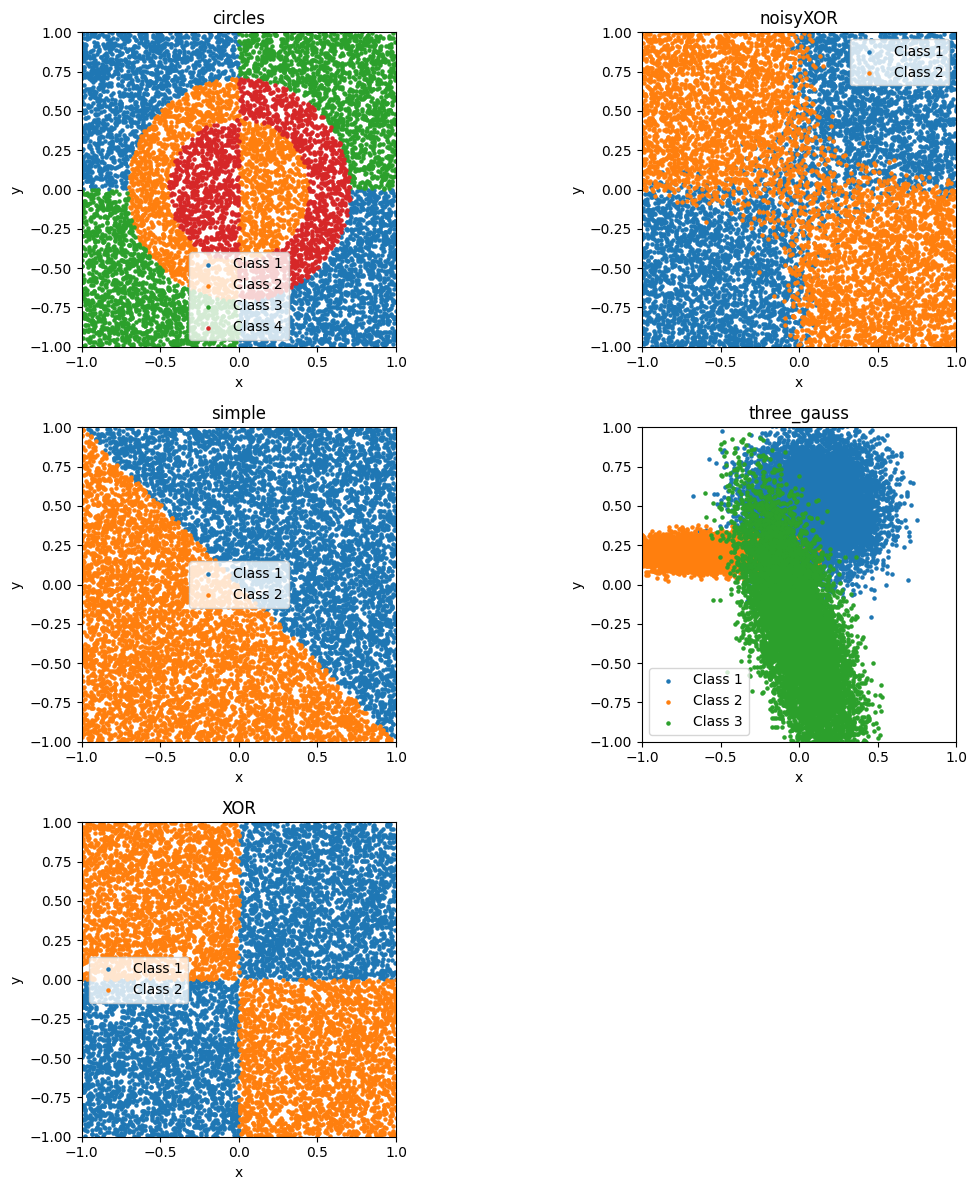

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Get all files with suffix '100' from Classification directory
files = glob.glob('data/Classification/*10000.csv')

# Create a figure with subplots
n_files = len(files)
n_cols = 2
n_rows = (n_files + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.flatten()

# Plot each dataset
for idx, file in enumerate(files):
    # Read the data
    df = pd.read_csv(file)
    
    # Get dataset name from filename
    dataset_name = os.path.basename(file).replace('data.', '').replace('.train.10000.csv', '')
    
    # Get unique classes and create scatter plot for each class
    unique_classes = np.sort(df['cls'].unique())
    for cls in unique_classes:
        mask = df['cls'] == cls
        axes[idx].scatter(df[mask]['x'], df[mask]['y'], 
                         label=f'Class {cls}', 
                         s=5)  # Smaller point size
    
    axes[idx].set_title(dataset_name)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].legend()
    
    # Set axis limits
    axes[idx].set_xlim([-1, 1])
    axes[idx].set_ylim([-1, 1])
    
    # Make plot square
    axes[idx].set_aspect('equal')

# Remove empty subplots if any
for idx in range(n_files, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

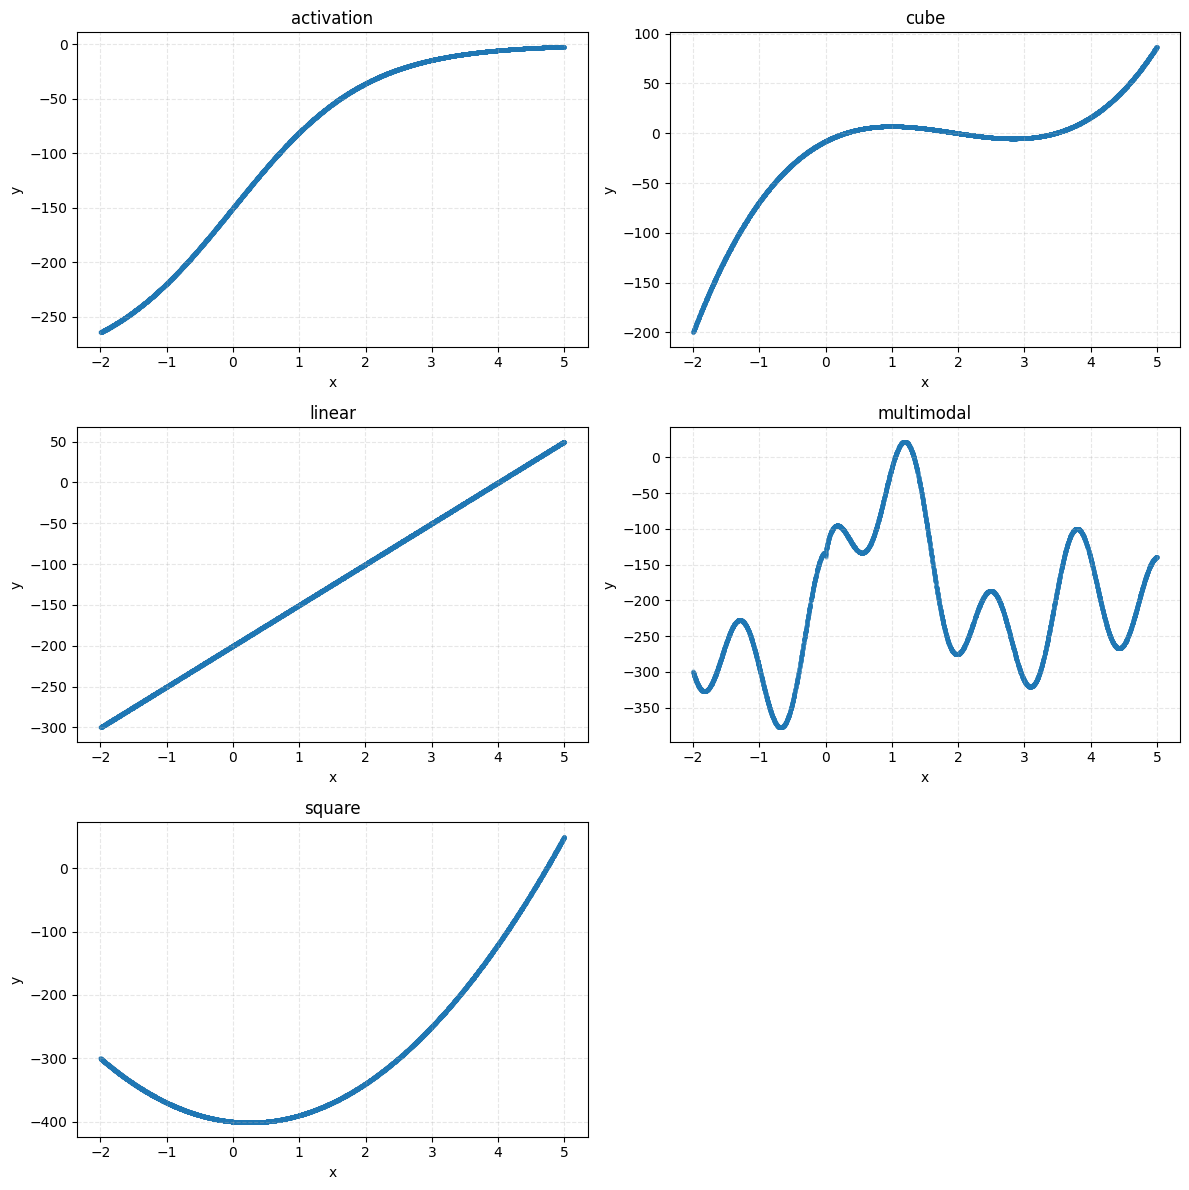

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Get all files with suffix 10000 from Regression directory
files = sorted(glob.glob('data/Regression/*10000.csv'))

# Create a figure with subplots
n_files = len(files)
n_cols = 2
n_rows = (n_files + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.flatten()

# Plot each dataset
for idx, file in enumerate(files):
    # Read the data
    df = pd.read_csv(file)
    
    # Sort by x for better visualization of function shape
    df = df.sort_values('x')
    
    # Get dataset name from filename
    dataset_name = os.path.basename(file).replace('data.', '').replace('.train.10000.csv', '')
    
    # Create scatter plot
    axes[idx].scatter(df['x'], df['y'], s=5, alpha=0.3)  # Even smaller points and more transparency
    
    axes[idx].set_title(dataset_name)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    
    # Adjust plot limits to data with some margin
    x_margin = (df['x'].max() - df['x'].min()) * 0.05
    y_margin = (df['y'].max() - df['y'].min()) * 0.05
    
    axes[idx].set_xlim([df['x'].min() - x_margin, df['x'].max() + x_margin])
    axes[idx].set_ylim([df['y'].min() - y_margin, df['y'].max() + y_margin])
    
    # Add grid
    axes[idx].grid(True, linestyle='--', alpha=0.3)

# Remove empty subplots if any
for idx in range(n_files, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

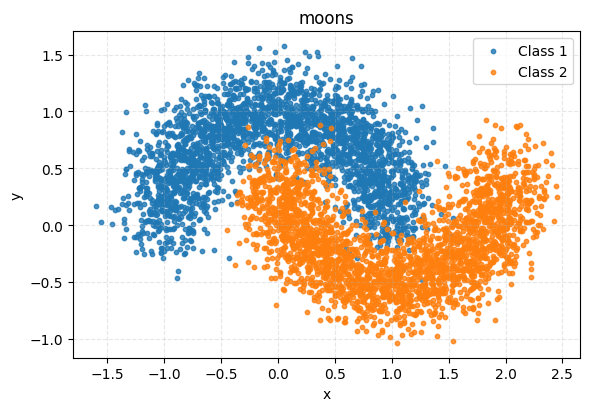

In [28]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate 1000 moons points
X, y = make_moons(n_samples=5000, noise=0.2, random_state=42)

df = pd.DataFrame({'x': X[:,0], 'y': X[:,1], 'cls': y + 1})  # classes 1 and 2 to match previous plots

fig, ax = plt.subplots(figsize=(6,6))
unique_classes = np.sort(df['cls'].unique())
for cls in unique_classes:
    mask = df['cls'] == cls
    ax.scatter(df[mask]['x'], df[mask]['y'], label=f'Class {int(cls)}', s=10, alpha=0.8)

ax.set_title('moons')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Set limits with a small margin
x_margin = (df['x'].max() - df['x'].min()) * 0.05
y_margin = (df['y'].max() - df['y'].min()) * 0.05
ax.set_xlim(df['x'].min() - x_margin, df['x'].max() + x_margin)
ax.set_ylim(df['y'].min() - y_margin, df['y'].max() + y_margin)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()